In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from train import *

In [5]:
from infer import *
import notebook_utils as nutils
import cv2
import os
import time
import matplotlib.pyplot as plt
from sort.sort import *
from tqdm import tqdm

# import sys;
# sys.path.append('/home/haotruong/Receipt/EasyOCR')

# import easyocr
# reader = easyocr.Reader(['en'], gpu=True)

def recognize_text(img, bboxes, target=None):
    offset = 5

    total_result = []
    
    for bbox in np.array(bboxes, dtype=np.int32)[:]:
        x0, y0, x1, y1 = bbox
        i = img[y0 - offset: y1+offset, x0-offset : x1+offset]

        results = []

        for n in range(4):
            data = reader.recognize(np.rot90(i, n))
            text = data[0][1]
            if target:
                if (target in text) or (text in target):
                    results.append(text)
            else:
                results.append(data[0][1])
            
        total_result.append(results)

    return total_result

classes = ['ocr']
classes = ['552F', '550SF','550PF', '552SF', '551F', '551GPF', '522F']
predictor = get_predictor("ocr_spec.pth", classes, 800)
file = 'OCR/552F/11.JPG'
bboxes, classes, scores, v = infer('ocr', predictor, file, True, 0.5)

/home/haotruong/.local/lib/python3.7/site-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


In [18]:
base_classes = ['552F', '550SF','550PF', '552SF', '551F', '551GPF', '522F']

In [6]:
files = nutils.list_files("OCR", "**/*.JPG")

In [21]:
for index, file in enumerate(files):    
    try:
        bboxes, classes, scores, v = infer('ocr', predictor, str(file), True, 0.5, True)

        target = parse_file(str(file.with_suffix(".xml")))['object'][0]['name']

    #         text_list = recognize_text(v.img, bboxes, target=target)

        for classid, bbox in zip(classes, bboxes):
            text = base_classes[classid]
            v.draw_text(text, (int((bbox[0] + bbox[2])/2) , int((bbox[1])) - 20), font_size= 20, color='r')

        cv2.imwrite("OCR/OCR_Result_2/{}.jpg".format(index), cv2.cvtColor(v.output.get_image(), cv2.COLOR_RGB2BGR )   )

        print("{} / {}".format(index+1, len(files)))
    except:
        pass
#     nutils.imshow(v.output.get_image(), 55)

1 / 333
2 / 333
3 / 333
4 / 333
5 / 333
6 / 333
7 / 333
8 / 333
9 / 333
10 / 333
11 / 333
12 / 333
13 / 333
14 / 333
15 / 333
16 / 333
17 / 333
18 / 333
19 / 333
20 / 333
21 / 333
22 / 333
23 / 333
24 / 333
25 / 333
26 / 333
27 / 333
28 / 333
29 / 333
30 / 333
31 / 333
32 / 333
33 / 333
34 / 333
35 / 333
36 / 333
37 / 333
38 / 333
39 / 333
40 / 333
41 / 333
42 / 333
43 / 333
44 / 333
45 / 333
46 / 333
47 / 333
48 / 333
49 / 333
50 / 333
51 / 333
52 / 333
53 / 333
54 / 333
55 / 333
56 / 333
57 / 333
58 / 333
59 / 333
60 / 333
61 / 333
63 / 333
64 / 333
65 / 333
66 / 333
67 / 333
68 / 333
69 / 333
70 / 333
71 / 333
72 / 333
73 / 333
74 / 333
75 / 333
76 / 333
77 / 333
78 / 333
79 / 333
80 / 333
81 / 333
82 / 333
83 / 333
84 / 333
85 / 333
86 / 333
87 / 333
89 / 333
90 / 333
91 / 333
92 / 333
93 / 333
94 / 333
95 / 333
96 / 333
97 / 333
99 / 333
100 / 333
101 / 333
102 / 333
103 / 333
104 / 333
105 / 333
106 / 333
107 / 333
108 / 333
109 / 333
110 / 333
111 / 333
112 / 333
113 / 333
114 /

In [20]:
files = nutils.list_files("OCR/OCR", "*.JPG")
for i, f in enumerate(files):
    bboxes, classes, scores, v = infer('ocr', predictor, str(f), True, 0.5)
    for bbox in bboxes:
        v.draw_box(bbox, alpha = 1)

    predicted_image = v.output.get_image()
    
    cv2.imwrite("OCR/OCR_Result/{}.jpg".format(i), cv2.cvtColor(predicted_image, cv2.COLOR_RGB2BGR) )
#     nutils.imshow(predicted_image)
#     plt.show()


In [11]:
import notebook_utils as nutils


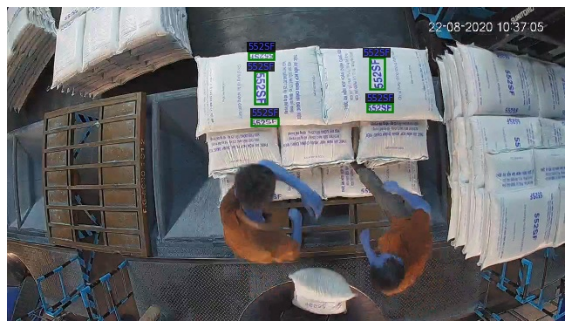

In [29]:
nutils.imshow(cv2.imread("OCR/OCR_Result_2/{}.jpg".format(300)), 10)

In [3]:
mp4_files = nutils.list_files("data", "CAM 1-*.mp4")
path = mp4_files[0]

In [4]:
time_per_frame = (1/30) * 1000

In [ ]:
for path in mp4_files:
    out = cv2.VideoWriter("temp.mp4",cv2.VideoWriter_fourcc(*'MP4V'), 30, (640, 360))
    vc = cv2.VideoCapture(str(path))

#     start_frame = 10800#12600 #10800
#     vc.set(1,start_frame);

    rval = True

    frame_id = 0
    max_frame = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))

    counter = 0

    pbar = tqdm(total=max_frame, position=0, leave=True)
    
    mot_tracker = Sort(min_hits= 0)
    mot_tracker.reset_count()
    while rval:
        rval , frame = vc.read()

        if rval:
            start = time.time()

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            bboxes, classes, scores, v = infer('baocam', predictor, image, True, 0.5)
            track_bbs_ids = mot_tracker.update(bboxes)

            for bbox in bboxes:
                v.draw_box(bbox, alpha = 1)

            for bbox in track_bbs_ids:
                counter = bbox[-1]
                v.draw_text(str(int(counter)), (int( (bbox[0] + bbox[2]) /2 ) , int((bbox[1] + bbox[3]) /2 )), font_size= 70, color='g')


            v.draw_text(str(int(counter)), (200 , 200), font_size= 200, color='g')

            predicted_image = v.output.get_image()
            total_time = (time.time() - start) * 1000

            skip_frame = int(np.ceil(total_time / time_per_frame))

            out.write(predicted_image)

            frame_id += 1
            pbar.update(1)
            
            for i in range(skip_frame):
                out.write(predicted_image)
                vc.read()
                pbar.update(1)
                frame_id += 1


    #         plt.imshow(predicted_image)
    #         plt.show()

#             print(frame_id)
            if frame_id > (max_frame - 100):
                break

    out.release()
    vc.release()

    new_file = "{}_export.mp4".format(path.stem).replace(" ", "") 
    cmd = "ffmpeg -i temp.mp4 -vcodec libx264 {} -y".format(new_file)
    print(cmd)
    os.system(cmd)

100%|█████████▉| 115327/115433 [38:05<00:02, 51.43it/s]

ffmpeg -i temp.mp4 -vcodec libx264 CAM1-CPL_FGAGro_38_63-20200822-064459_export.mp4 -y


 88%|████████▊ | 63382/71995 [21:21<02:57, 48.51it/s]s]

In [443]:
from IPython.display import Video

Video(new_file, width = 800)

In [85]:
out.release()
vc.release()

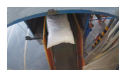

In [3]:
v.draw_box(bboxes[0])

out = v.output.get_image()

nutils.imshow(out, 2)

In [ ]:
vc = cv2.VideoCapture(str(path))

start_frame = 12640
vc.set(1,start_frame);

mot_tracker = Sort(min_hits= 0) 
mot_tracker.reset_count()
counter = 0

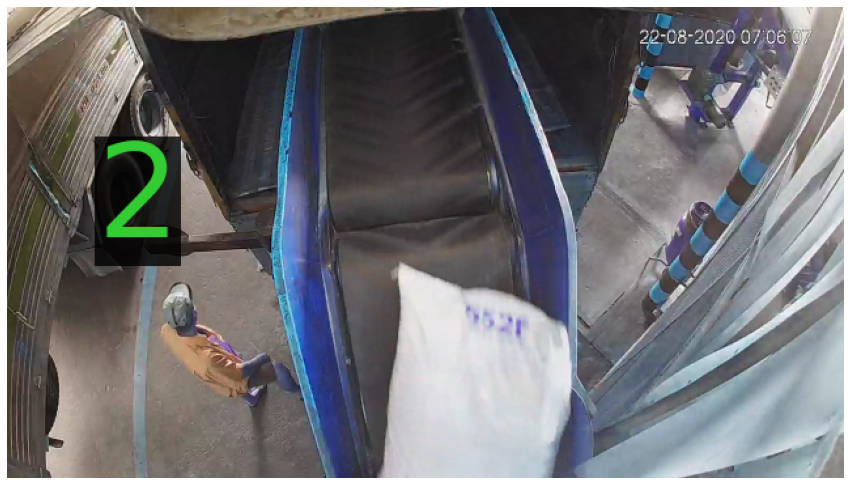

In [433]:
rval , frame = vc.read()
start = time.time()

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
bboxes, classes, scores, v = infer('baocam', predictor, image, True, 0.5)

track_bbs_ids = mot_tracker.update(bboxes)


for bbox in bboxes:
    v.draw_box(bbox, 1)
    
for bbox in track_bbs_ids:
    counter = bbox[-1]    
    v.draw_box(bbox[:4], edge_color='r')

        
v.draw_text(str(int(counter)), (200 , 200), font_size= 200, color='g')

predicted_image = v.output.get_image()

total_time = (time.time() - start) * 1000

skip_frame = int(np.ceil(total_time / time_per_frame))
for i in range(skip_frame):
    vc.read()
    
nutils.imshow(predicted_image, 15)